In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas as pd
import sklearn
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [2]:
names = ['buying','maint','doors','persons','lug_boot','safety','class']
dataset = pd.read_csv("cardata1.csv", names=names)

### Shape of the actual dataset

In [15]:
print(dataset.shape)

(1728, 7)


In [16]:
#Correlation values
print(dataset.corr()["class"].abs().sort_values(ascending=False))

class       1.000000
safety      0.439337
persons     0.373459
buying      0.282750
maint       0.232422
lug_boot    0.157932
doors       0.066057
Name: class, dtype: float64


### First 5 entries

In [4]:
print(dataset.head())

   buying  maint  doors  persons  lug_boot  safety  class
0       4      4      2        2         1       1      1
1       4      4      2        2         1       2      1
2       4      4      2        2         1       3      1
3       4      4      2        2         2       1      1
4       4      4      2        2         2       2      1


### Class distribution

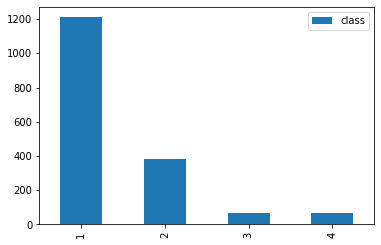

In [5]:
class_distribution = pd.Series(dataset['class']).value_counts().plot(kind='bar', legend="true")

### Data visualization

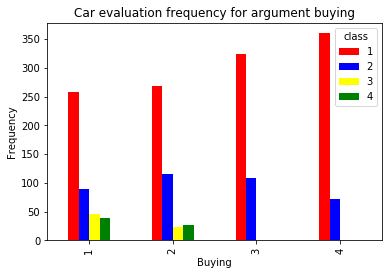

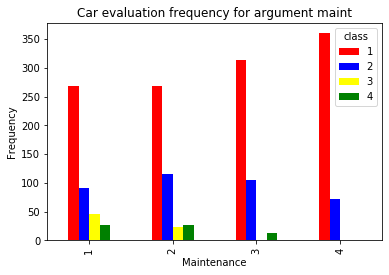

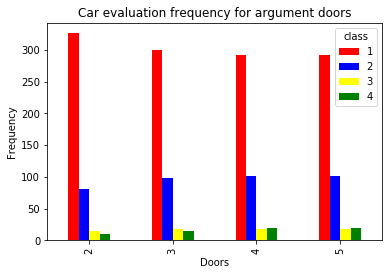

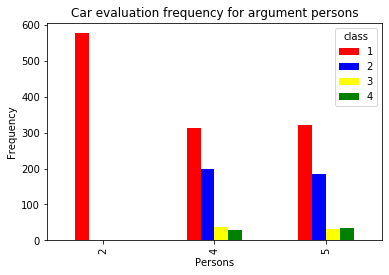

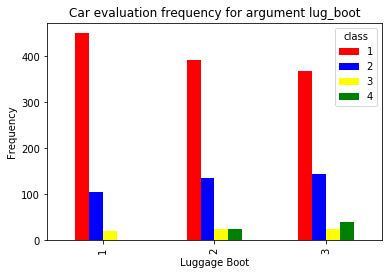

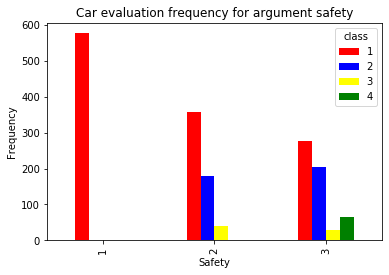

In [12]:
pd.crosstab(dataset["buying"],dataset["class"]).plot(kind="bar",color=['Red','Blue','Yellow','Green'])
plt.title('Car evaluation frequency for argument buying')
plt.xlabel('Buying')
plt.ylabel('Frequency')
plt.show()

pd.crosstab(dataset["maint"],dataset["class"]).plot(kind="bar",color=['Red','Blue','Yellow','Green'])
plt.title('Car evaluation frequency for argument maint')
plt.xlabel('Maintenance')
plt.ylabel('Frequency')
plt.show()

pd.crosstab(dataset["doors"],dataset["class"]).plot(kind="bar",color=['Red','Blue','Yellow','Green'])
plt.title('Car evaluation frequency for argument doors')
plt.xlabel('Doors')
plt.ylabel('Frequency')
plt.show()

pd.crosstab(dataset["persons"],dataset["class"]).plot(kind="bar",color=['Red','Blue','Yellow','Green'])
plt.title('Car evaluation frequency for argument persons')
plt.xlabel('Persons')
plt.ylabel('Frequency')
plt.show()

pd.crosstab(dataset["lug_boot"],dataset["class"]).plot(kind="bar",color=['Red','Blue','Yellow','Green'])
plt.title('Car evaluation frequency for argument lug_boot')
plt.xlabel('Luggage Boot')
plt.ylabel('Frequency')
plt.show()

pd.crosstab(dataset["safety"],dataset["class"]).plot(kind="bar",color=['Red','Blue','Yellow','Green'])
plt.title('Car evaluation frequency for argument safety')
plt.xlabel('Safety')
plt.ylabel('Frequency')
plt.show()



In [7]:
array = dataset.values
X = array[:,0:6]
Y = array[:,6]

In [24]:
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size,
random_state = 14)

In [18]:
models = []
models.append(("MLPClassifier", MLPClassifier(solver = "lbfgs", hidden_layer_sizes = [100]*3)))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='auto')))

In [22]:
for name, model in models:
    model.fit(X_train,Y_train)
    predictions = model.predict(X_validation)
    print(name)
    print(accuracy_score(Y_validation, predictions))
    print(classification_report(Y_validation, predictions)) 
    print(confusion_matrix(Y_validation, predictions))
    print()

MLPClassifier
0.9421965317919075
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       237
           2       0.93      0.85      0.89        82
           3       0.90      0.69      0.78        13
           4       0.72      0.93      0.81        14

    accuracy                           0.94       346
   macro avg       0.88      0.87      0.87       346
weighted avg       0.94      0.94      0.94       346

[[234   3   0   0]
 [  9  70   1   2]
 [  0   1   9   3]
 [  0   1   0  13]]

LR
0.8063583815028902
              precision    recall  f1-score   support

           1       0.86      0.97      0.91       237
           2       0.66      0.52      0.59        82
           3       0.50      0.15      0.24        13
           4       0.43      0.21      0.29        14

    accuracy                           0.81       346
   macro avg       0.61      0.47      0.50       346
weighted avg       0.78      0.81      0.78       34